In [ ]:
import cv2,os
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import load_model
import tensorflow as tf
from keras.models import save_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [ ]:
data_path='/content/drive/MyDrive/final year project/Dataset'
categories=os.listdir(data_path)                        
labels=[i for i in range(len(categories))]

In [ ]:
label_dict=dict(zip(categories,labels))

In [ ]:
print(label_dict)
print(categories)
print(labels)

{'Viral Pneumonia': 0, 'Normal': 1, 'COVID': 2}
['Viral Pneumonia', 'Normal', 'COVID']
[0, 1, 2]


In [ ]:
img_size=100
data=[]
target=[]

In [ ]:
for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


In [ ]:
print(len(data))
print(len(target))

15153
15153


In [ ]:
data

[array([[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 35,  35,  35],
         [153, 153, 153],
         [ 19,  19,  19]],
 
        [[  2,   2,   2],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 43,  43,  43],
         [ 53,  53,  53],
         [135, 135, 135]],
 
        ...,
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 19,  19,  19],
         [ 69,  69,  69],
         [152, 152, 152]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [120, 120, 120],
         [ 24,  24,  24]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [ ]:
data=np.array(data)/255.0
print(data)

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.1372549  0.1372549  0.1372549 ]
   [0.6        0.6        0.6       ]
   [0.0745098  0.0745098  0.0745098 ]]

  [[0.00784314 0.00784314 0.00784314]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.16862745 0.16862745 0.16862745]
   [0.20784314 0.20784314 0.20784314]
   [0.52941176 0.52941176 0.52941176]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.0745098  0.0745098  0.0745098 ]
   [0.27058824 0.27058824 0.27058824]
   [0.59607843 0.59607843 0.59607843]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
data.shape

(15153, 100, 100, 3)

In [ ]:
type(data)
len(data)
data[1].shape

(100, 100, 3)

In [ ]:
#xx=np.array(xx).reshape(-1,img_size2,img_size2,1)
#data=np.reshape(data,(data.shape[0],img_size,img_size,1))
#data = np.array(data).reshape(-1,img_size,img_size,1)
data = np.reshape(data,(data.shape[0],img_size,img_size,3))

In [ ]:
data.shape

(15153, 100, 100, 3)

In [ ]:
print(data)
print(data.shape)

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.1372549  0.1372549  0.1372549 ]
   [0.6        0.6        0.6       ]
   [0.0745098  0.0745098  0.0745098 ]]

  [[0.00784314 0.00784314 0.00784314]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.16862745 0.16862745 0.16862745]
   [0.20784314 0.20784314 0.20784314]
   [0.52941176 0.52941176 0.52941176]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.0745098  0.0745098  0.0745098 ]
   [0.27058824 0.27058824 0.27058824]
   [0.59607843 0.59607843 0.59607843]]

  [[0.         0.         0.        ]
   [0. 

In [ ]:
target=np.array(target)

In [ ]:
print(target)

[0 0 0 ... 2 2 2]


In [ ]:
new_target=np_utils.to_categorical(target)   #convert into binary

In [ ]:
print(new_target)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
np.save('/content/drive/MyDrive/final year project/Important/data',data)
np.save('/content/drive/MyDrive/final year project/Important/target',new_target)

In [ ]:
new_target.shape

(15153, 3)

In [ ]:
data=np.load('/content/drive/MyDrive/final year project/Important/data.npy')
target=np.load('/content/drive/MyDrive/final year project/Important/target.npy')

In [ ]:
data.shape[1]

100

In [ ]:
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
data.shape

(15153, 100, 100, 3)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=100,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/100
341/341 [==============================] - 36s 65ms/step - loss: 0.5873 - accuracy: 0.7333 - val_loss: 0.3719 - val_accuracy: 0.8537
Epoch 2/100
341/341 [==============================] - 19s 56ms/step - loss: 0.3822 - accuracy: 0.8368 - val_loss: 0.2968 - val_accuracy: 0.8754
Epoch 3/100
341/341 [==============================] - 19s 56ms/step - loss: 0.3277 - accuracy: 0.8597 - val_loss: 0.2696 - val_accuracy: 0.8955
Epoch 4/100
341/341 [==============================] - 20s 59ms/step - loss: 0.2837 - accuracy: 0.8826 - val_loss: 0.2363 - val_accuracy: 0.9113
Epoch 5/100
341/341 [==============================] - 19s 57ms/step - loss: 0.2508 - accuracy: 0.8961 - val_loss: 0.2067 - val_accuracy: 0.9230
Epoch 6/100
341/341 [==============================] - 17s 51ms/step - loss: 0.2322 - accuracy: 0.9063 - val_loss: 0.2190 - val_accuracy: 0.9230
Epoch 7/100
341/341 [==============================] - 19s 56ms/step - loss: 0.2119 - accuracy: 0.9147 - val_loss: 0.1878 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 activation (Activation)     (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                    

In [ ]:
print("[INFO] saving covid detection model...")
model.save('/content/drive/MyDrive/final year project/Important/xray.model', save_format="h5")

[INFO] saving covid detection model...


In [ ]:
print(model.evaluate(test_data,test_target))

48/48 [==============================] - 1s 23ms/step - loss: 0.1667 - accuracy: 0.9637
[0.16667330265045166, 0.9637203216552734]


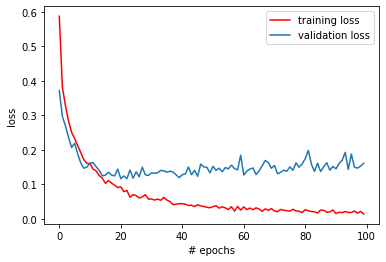

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/final year project/training loss.jpg',pad_inches = 1)

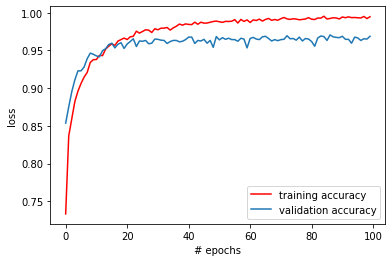

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/final year project/training accuracy.jpg',pad_inches = 1)

In [ ]:
model = load_model('/content/drive/MyDrive/final year project/Important/xray.model')

In [ ]:
img_path = '/content/testingimage.jpg'
testing=cv2.imread(img_path)
resized=cv2.resize(testing,(100,100))

normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,3))
result=model.predict(reshaped)
print(result)


[[8.8137503e-27 2.4226043e-35 1.0000000e+00]]


In [ ]:
c = -1
for k in result:
  for i in k:
    c = c+1
    #print(i)
    d = round(i)
    if  d == 1:
      print(c)
    

2


In [ ]:
round(1.368512e-16)

0

In [ ]:
type(test_data)

numpy.ndarray

In [ ]:
type(test_target)

numpy.ndarray

In [ ]:
np.save('/content/drive/MyDrive/final year project/test_data',test_data)
np.save('/content/drive/MyDrive/final year project/test_target',test_target)

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
y_pred

array([[9.9999964e-01, 3.6206319e-07, 1.7784184e-09],
       [4.2494293e-04, 9.9957508e-01, 4.6403112e-10],
       [1.1608696e-16, 4.7312656e-09, 1.0000000e+00],
       ...,
       [2.4055294e-14, 1.3429596e-08, 1.0000000e+00],
       [2.9632476e-20, 3.3791377e-08, 1.0000000e+00],
       [2.9837754e-22, 9.9999988e-01, 9.8720996e-08]], dtype=float32)

In [ ]:
test_target

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

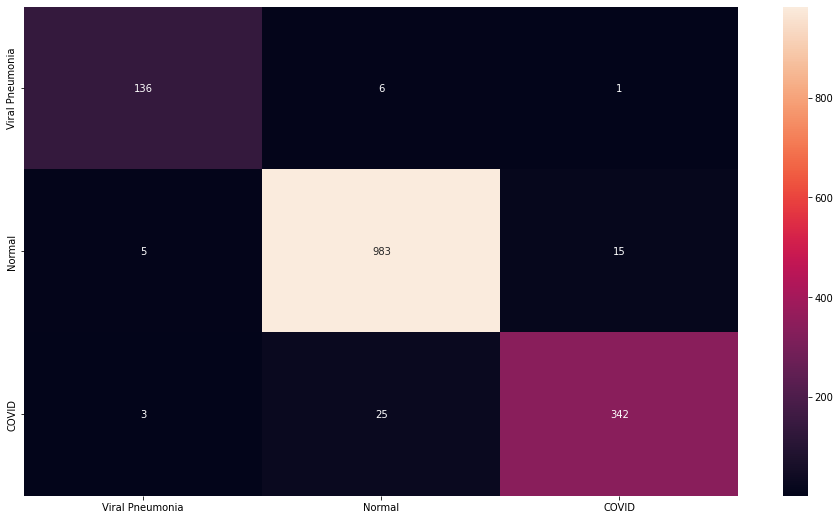

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
test_target_labels = [np.argmax(label) for label in test_target]
cm = confusion_matrix(test_target_labels,y_pred_labels)

sns.heatmap(cm,annot= True, fmt = 'd',xticklabels =categories,yticklabels= categories)
plt.show()
plt.savefig('/content/drive/MyDrive/final year project/Important/Confusion_Matrix.jpg',pad_inches = 1)

In [ ]:
from sklearn.metrics import classification_report
class_rep = classification_report(test_target_labels,y_pred_labels)
print(class_rep)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       143
           1       0.97      0.98      0.97      1003
           2       0.96      0.92      0.94       370

    accuracy                           0.96      1516
   macro avg       0.96      0.95      0.95      1516
weighted avg       0.96      0.96      0.96      1516



In [ ]:
type(class_rep)

str

In [ ]:
text_file = open("/content/drive/MyDrive/final year project/Important/classification report.txt", "w")
 
#write string to file
text_file.write(class_rep)
 
#close file
text_file.close()